 PyWavelets is open source wavelet transform software for Python. It combines a simple high level interface with low level C and Cython performance.

The main features of PyWavelets are:

- 1D, 2D and nD Forward and Inverse Discrete Wavelet Transform (DWT and IDWT)
- 1D, 2D and nD Multilevel DWT and IDWT
- 1D, 2D and nD Stationary Wavelet Transform (Undecimated Wavelet Transform)
- 1D and 2D Wavelet Packet decomposition and reconstruction
- 1D Continuous Wavelet Transform
- Computing Approximations of wavelet and scaling functions
- Over 100 built-in wavelet filters and support for custom wavelets
- Single and double precision calculations
- Real and complex calculations
- Results compatible with Matlab Wavelet Toolbox (TM)

In this example we will be using PyWavelets data library to give a sample image to work on, also, we will execute a discrete wavelet transform on the image. For the detection of horizontal, vertical and diagonal contour (edges) we use the Haar wavelet, that is the simplest family of wavelets. 

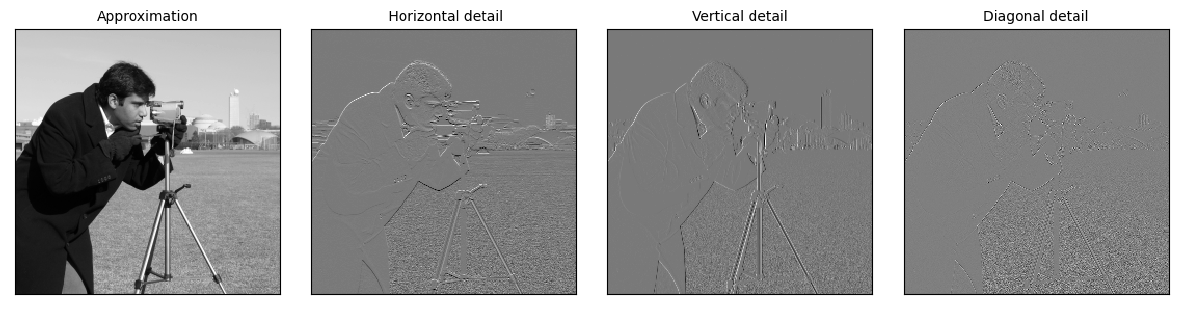

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

Scaleogram is a user friendly plot tool for 1D data analysis with Continuous Wavelet Transform built on the [PyWavelets library](https://github.com/PyWavelets/pywt).

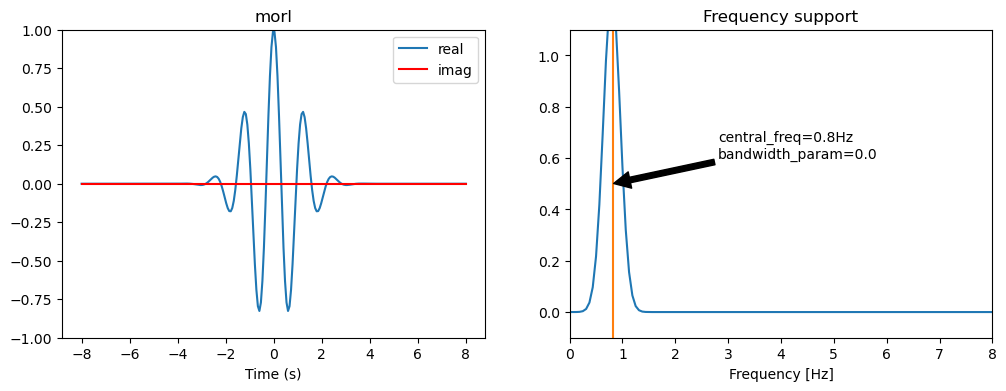

In [2]:
import scaleogram as scg 
#Morlet wavelet
axes = scg.plot_wav('morl', figsize=(12,4))

Let's check the built-in families of wavelets:

In [3]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

Plot the continous wavelets: 

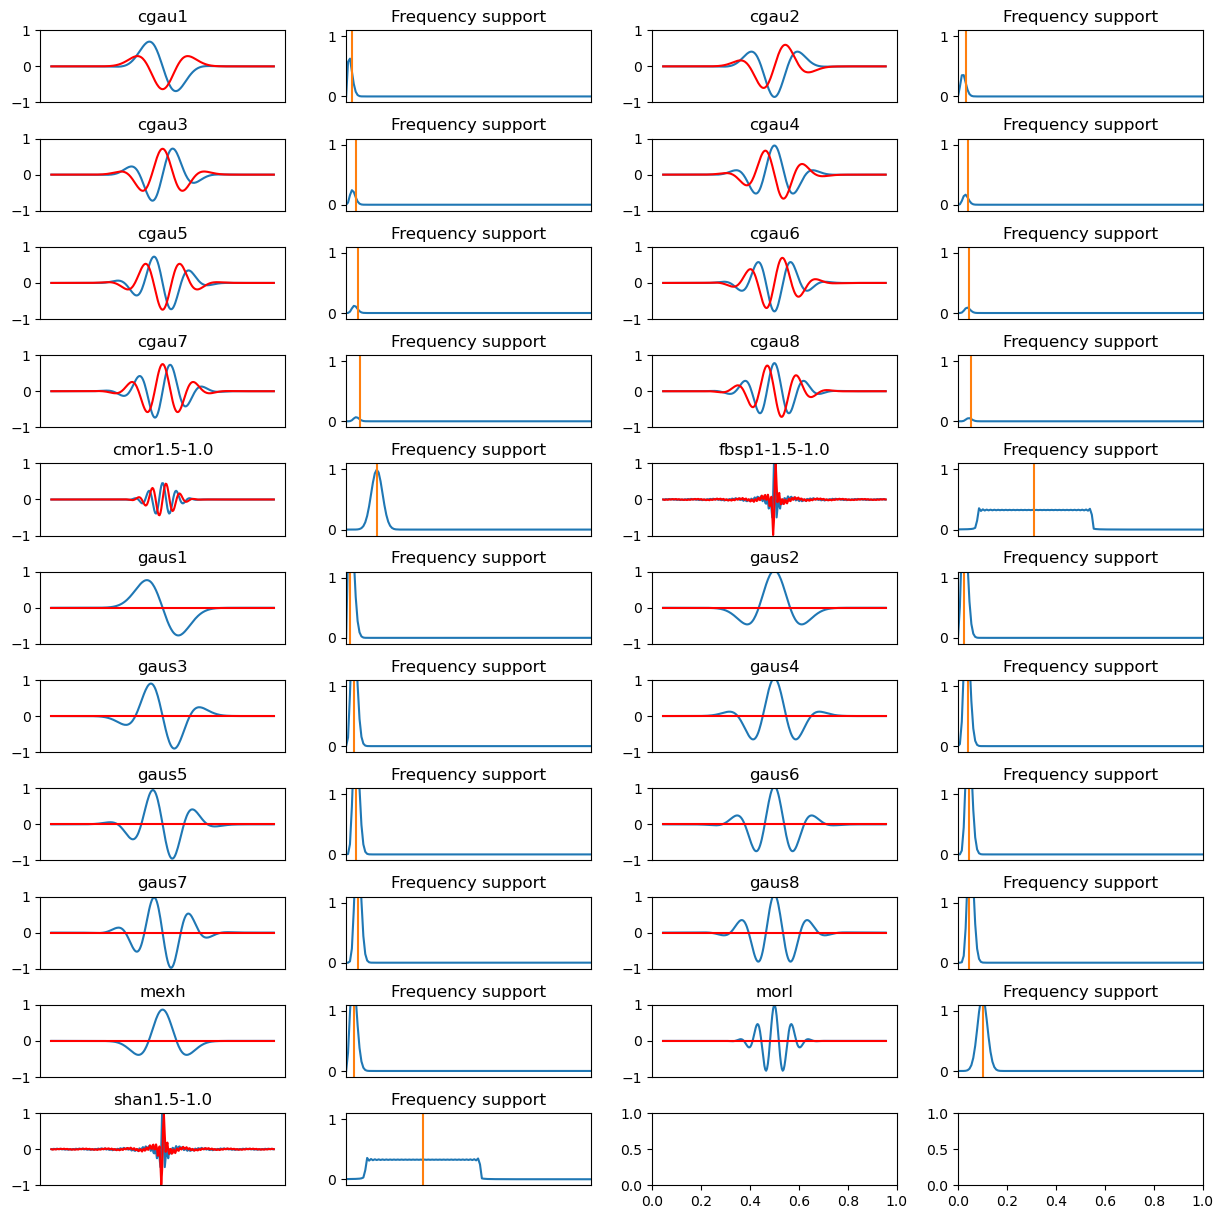

In [4]:
scg.plot_wavelets(figsize=(15,15))

An application of 1D continous wavelets is ECG signal analysis. In this example, we will show the first step to start such analysis, the production of the scaleogram, that is an illustration of the wavelet transform. The transform can be further used to detect R peaks, filter out noise by tresholding, and more. In this example we use morlet wavelets to transform an ECG strip from the MIT-BIH Arrhythmia Database. 

In [5]:
from ECGXMLReader.ECGXMLReader import ECGXMLReader

In [54]:
ecg = ECGXMLReader("/mnt/cluster_vsbud-dl1-005/hackathon/MUSE_20231121_140020_13000.xml", augmentLeads=True)

In [55]:
signal = ecg.Waveforms[1]


In [62]:
for i, (key, voltages) in enumerate(ecg.LeadVoltages[0].items()):
    print(key)

I
II
V1
V2
V3
V4
V5
V6
III
aVR
aVL
aVF


In [74]:
voltages = ecg.LeadVoltages[0]["III"]

In [75]:
import matplotlib.pyplot as plt

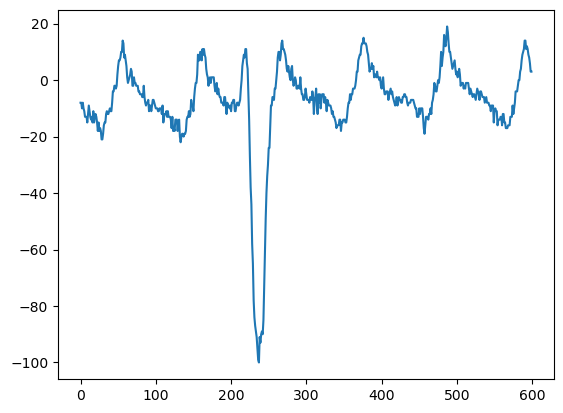

In [76]:
plt.plot(voltages)

Text(0.5, 1.0, 'ECG signal')

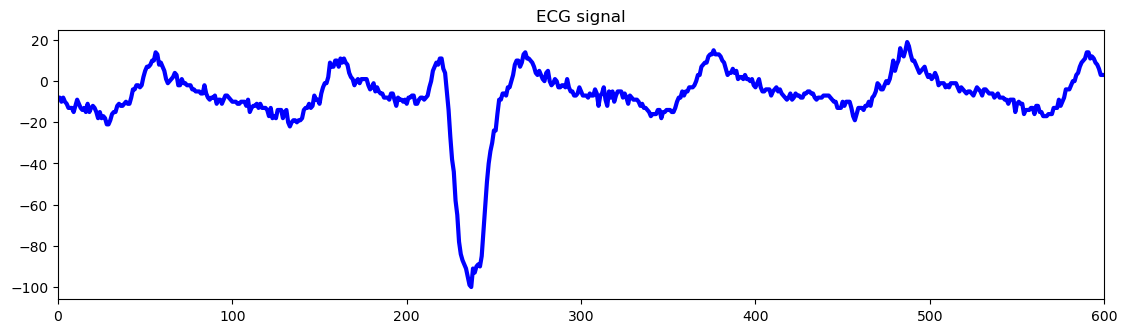

In [89]:
# choose default wavelet function 
scg.set_default_wavelet('morl')

F_S=500
ecg_data=voltages
signal_length = len(ecg_data)
fs=500
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, (signal_length+1)//2) )
time = np.arange(0,len(ecg_data),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(13.5, 3.5));  
ax1.plot(time, ecg_data, linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG signal")

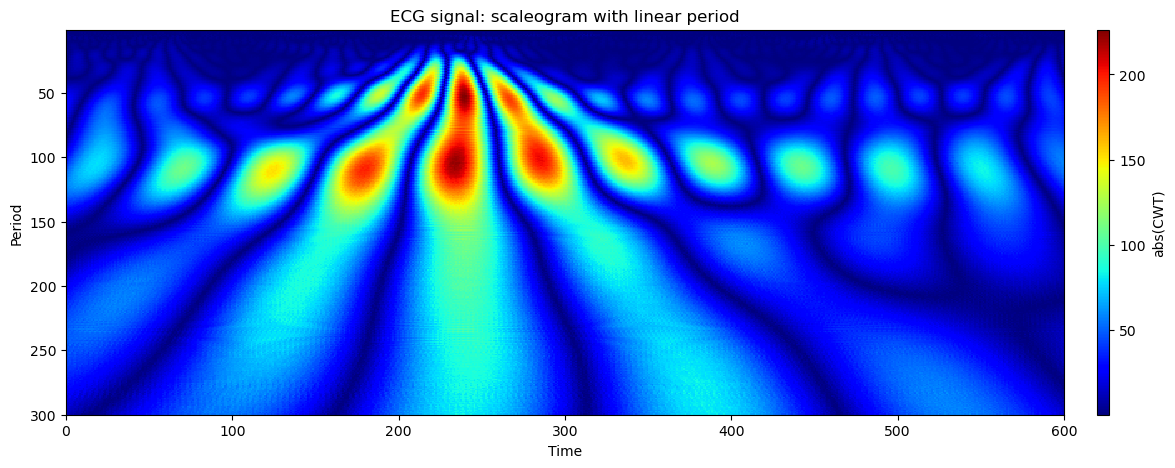

In [90]:
# the scaleogram
scg.cws(ecg_data, scales=scales, figsize=(14, 5), coi = False, ylabel="Period", xlabel="Time",
        title='ECG signal: scaleogram with linear period'); 

plt.savefig('wavelet.png')

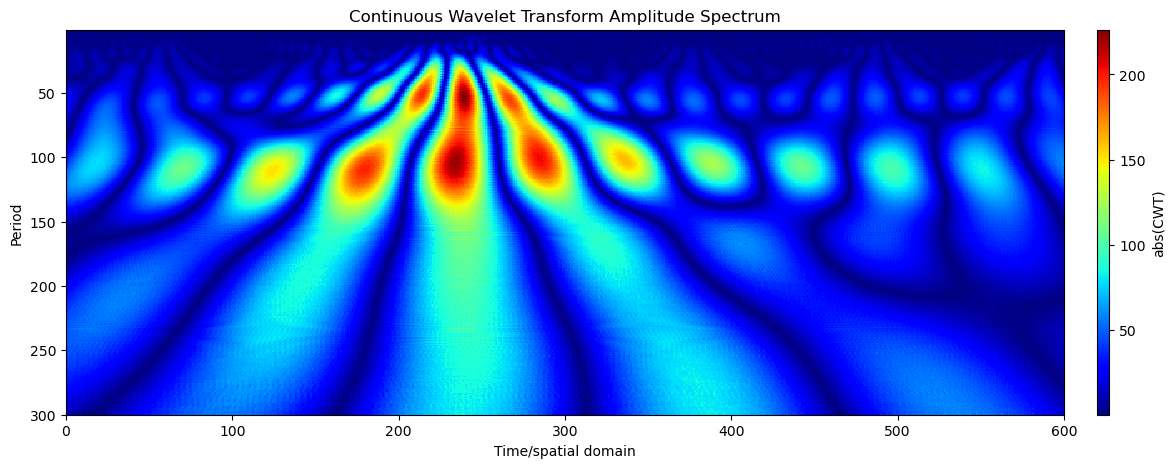

In [91]:
# the scaleogram
scg.cws(ecg_data, scales=scales, figsize=(14, 5), coi = False) 

plt.savefig('wavelet.png')

In [92]:
from scaleogram import fastcwt

In [93]:
coefs, scales_freq = fastcwt(ecg_data, scales, "morl")

In [94]:
coefs

array([[-2.44436697e-01, -1.01213118e-01, -1.11168353e-01, ...,
         1.84376107e-02, -8.76338123e-02,  5.00096930e-02],
       [-1.49782970e-01, -1.63726151e-01,  1.69128598e-01, ...,
         2.20635086e-01, -2.22799047e-01,  7.60600986e-02],
       [-1.51959441e+00, -3.06949399e-01,  4.62182372e-01, ...,
         6.22694721e-02, -7.35402904e-01,  8.71950886e-01],
       ...,
       [-1.44908060e+01, -1.30301169e+01, -1.20590469e+01, ...,
        -1.72168238e+01, -1.62477199e+01, -1.33299781e+01],
       [-1.28598351e+01, -1.21446736e+01, -1.09827390e+01, ...,
        -1.63443777e+01, -1.95993660e+01, -1.60384259e+01],
       [-1.30155992e+01, -1.13277200e+01, -1.04077487e+01, ...,
        -1.56913251e+01, -1.71533161e+01, -1.43738428e+01]])

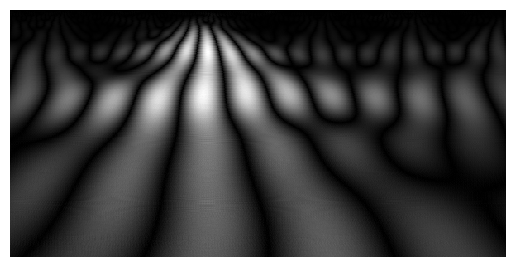

In [97]:
fig, ax = plt.subplots()
ax.matshow(np.abs(coefs), cmap="gray")
ax.axis('off')
fig.savefig('wavelet.png', bbox_inches='tight', pad_inches=0, transparent=True)

In [81]:
?plt.imshow

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`imag

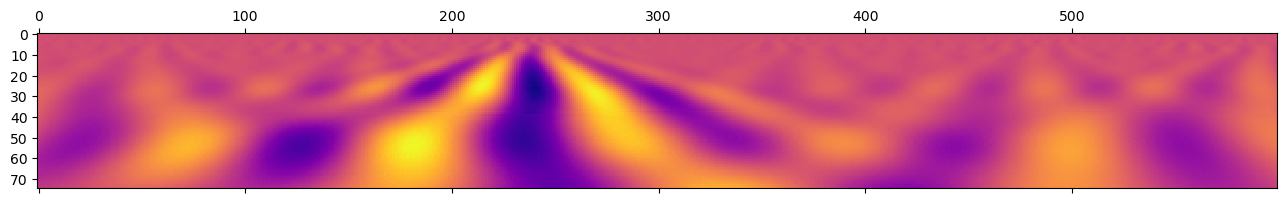

In [73]:
plt.matshow(coefs[::2], cmap="plasma", interpolation="nearest")

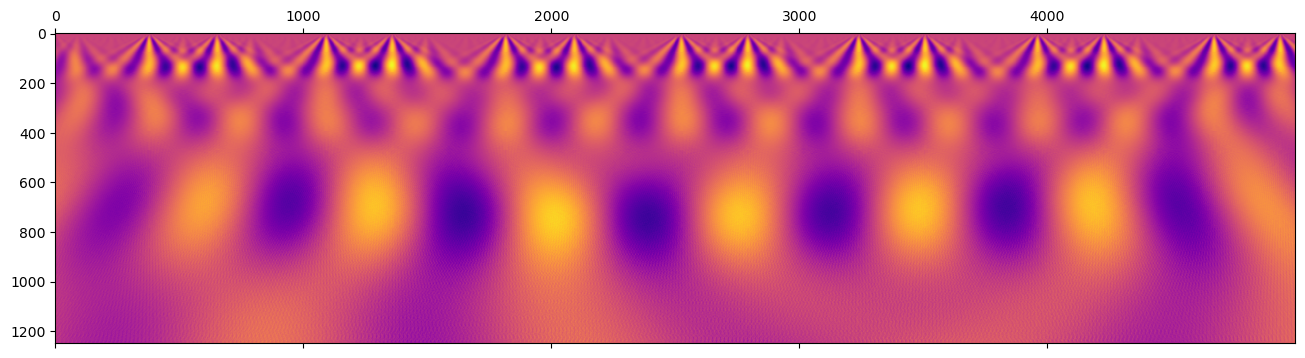

In [38]:
plt.matshow(coefs, cmap="plasma", interpolation="nearest")

In [39]:
?np.save

Signature: np.save(file, arr, allow_pickle=True, fix_imports=True)
Docstring:
Save an array to a binary file in NumPy ``.npy`` format.

Parameters
----------
file : file, str, or pathlib.Path
    File or filename to which the data is saved.  If file is a file-object,
    then the filename is unchanged.  If file is a string or Path, a ``.npy``
    extension will be appended to the filename if it does not already
    have one.
arr : array_like
    Array data to be saved.
allow_pickle : bool, optional
    Allow saving object arrays using Python pickles. Reasons for disallowing
    pickles include security (loading pickled data can execute arbitrary
    code) and portability (pickled objects may not be loadable on different
    Python installations, for example if the stored objects require libraries
    that are not available, and not all pickled data is compatible between
    Python 2 and Python 3).
    Default: True
fix_imports : bool, optional
    Only useful in forcing objects in obje

In [43]:
p = "/mnt/cluster_vsbud-dl1-005/hackathon_wavelet/MUSE_20231119_172953_56000.npy"

wavelet = np.load(p)

In [46]:
wavelet.shape

(12, 1249, 5000)

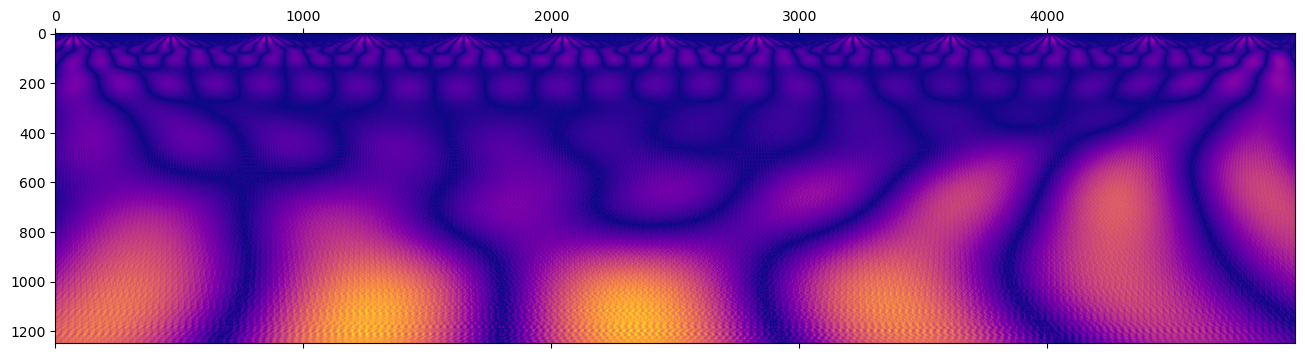

In [50]:
plt.matshow(np.abs(wavelet[1]), cmap="plasma", interpolation="nearest")